In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 8  
sz = 224 
PATH = './Images/'

In [4]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  2 classes:
 ['Gate', 'Space']


In [5]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: Gate


Class: Space


In [6]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [7]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 47 training images and 11 validation images.


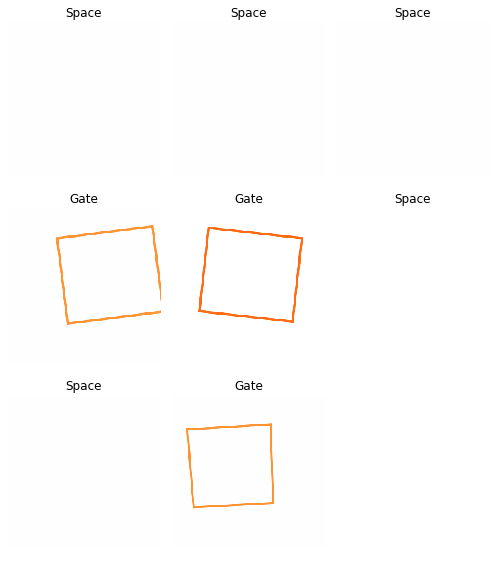

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [10]:
learn.save('final_model_drone.h5')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


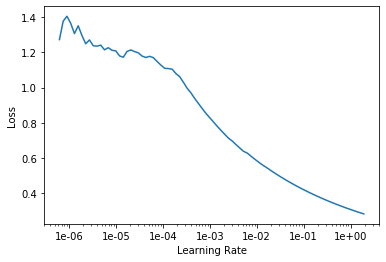

In [11]:
learn.lr_find();
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.299234,0.316478,1.000000,00:41
1,0.150098,0.055357,1.000000,00:37
2,0.094951,0.005711,1.000000,00:38
3,0.102397,0.002875,1.000000,00:34


In [13]:
interp = ClassificationInterpretation.from_learner(learn)

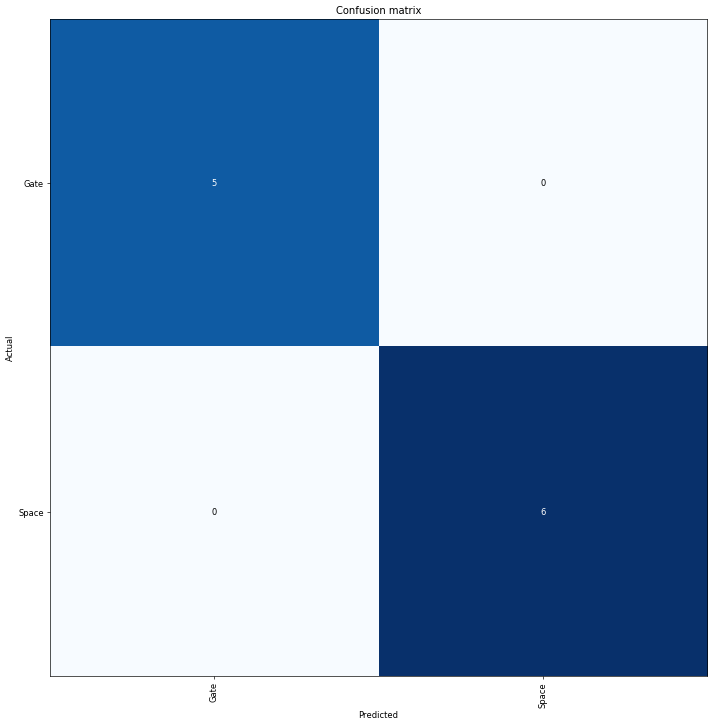

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

AttributeError: 'AxesSubplot' object has no attribute 'flat'

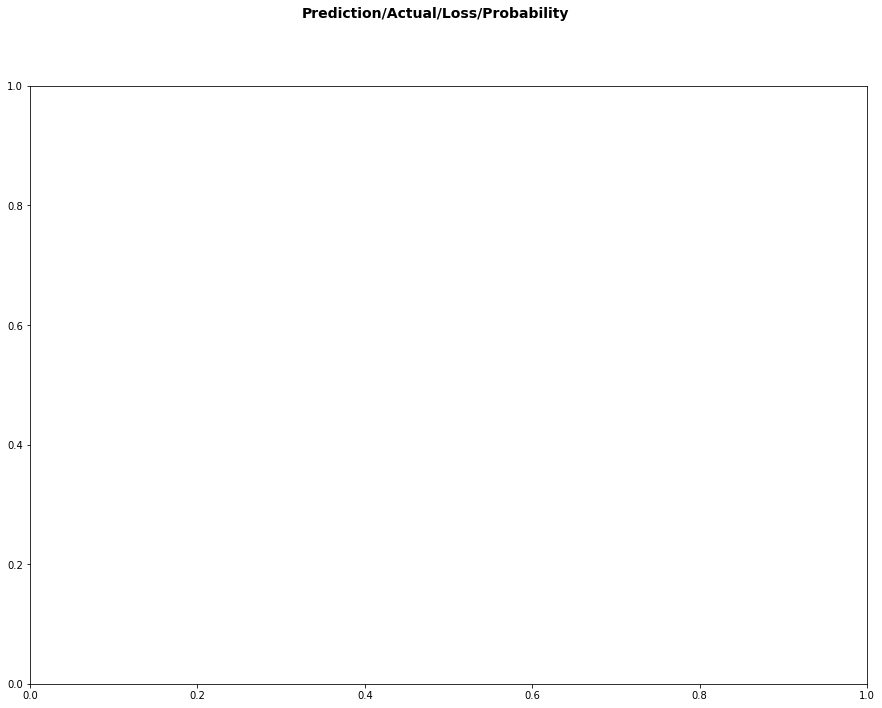

In [15]:
interp.plot_top_losses(1, figsize=(15,11), heatmap=False)

It is a Gate


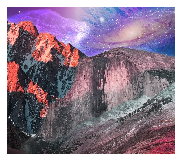

In [33]:
path = './GateAndspace/' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

In [25]:
learn.save('final_model_h5.h5')
